This code is intended to assess the distribution of my data based on the features for both the RNA and the proteins.

Processing file: /Users/marcobenavides/repos/ML-4-FG/3D-RBP/datasets/clip/21_PARCLIP_MOV10_Sievers_hg19/Combined_RNA_Protein_Matrix.csv
Processing file: /Users/marcobenavides/repos/ML-4-FG/3D-RBP/datasets/clip/25_CLIPSEQ_SFRS1_hg19/Combined_RNA_Protein_Matrix.csv
Processing file: /Users/marcobenavides/repos/ML-4-FG/3D-RBP/datasets/clip/3_HITSCLIP_Ago2_binding_clusters/Combined_RNA_Protein_Matrix.csv
Processing file: /Users/marcobenavides/repos/ML-4-FG/3D-RBP/datasets/clip/10_PARCLIP_ELAVL1A_hg19/Combined_RNA_Protein_Matrix.csv
Processing file: /Users/marcobenavides/repos/ML-4-FG/3D-RBP/datasets/clip/6_CLIP-seq-eIF4AIII_1/Combined_RNA_Protein_Matrix.csv
Processing file: /Users/marcobenavides/repos/ML-4-FG/3D-RBP/datasets/clip/31_ICLIP_U2AF65_Hela_iCLIP_ctrl+kd_all_clusters/Combined_RNA_Protein_Matrix.csv
Processing file: /Users/marcobenavides/repos/ML-4-FG/3D-RBP/datasets/clip/28_ICLIP_TIA1_hg19/Combined_RNA_Protein_Matrix.csv
Processing file: /Users/marcobenavides/repos/ML-4-FG/3D-RBP/

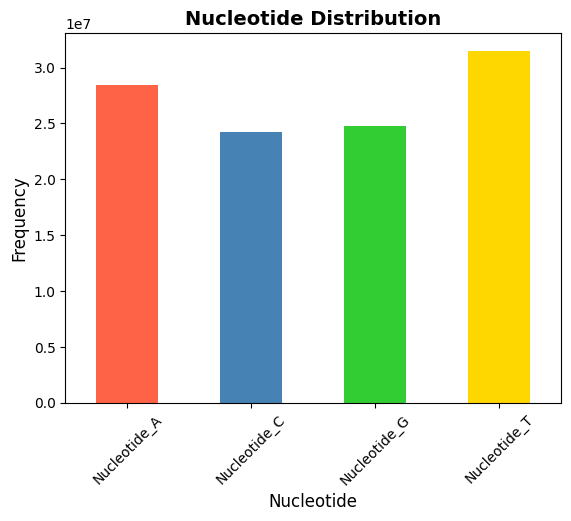

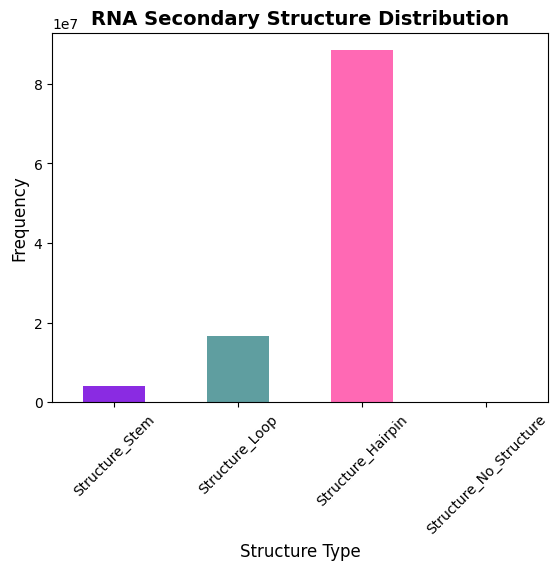

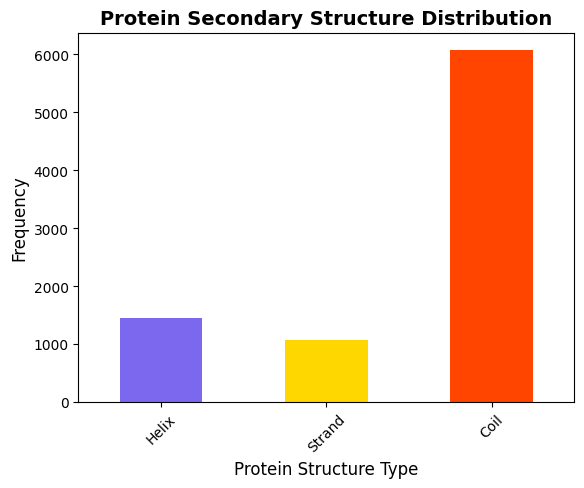

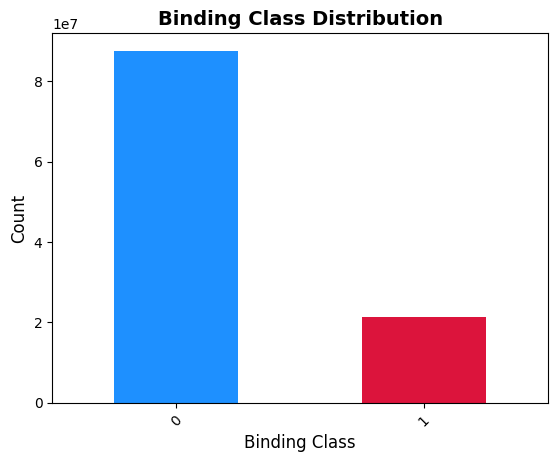

In [4]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt

# Define the base path relative to the current working directory
base_folder_path = os.path.join(os.getcwd(), "datasets", "clip")
file_pattern = os.path.join(base_folder_path, '**', 'Combined_RNA_Protein_Matrix.csv')

# Find all files matching the pattern
file_paths = glob.glob(file_pattern, recursive=True)

# Initialize counters for distributions
nucleotide_counts = pd.Series(dtype='int', index=['Nucleotide_A', 'Nucleotide_C', 'Nucleotide_G', 'Nucleotide_T']).fillna(0)
structure_counts = pd.Series(dtype='int', index=['Structure_Stem', 'Structure_Loop', 'Structure_Hairpin', 'Structure_No_Structure']).fillna(0)
protein_structure_counts = pd.Series(dtype='int', index=['Helix', 'Strand', 'Coil']).fillna(0)
binding_counts = pd.Series(dtype='int', index=[0, 1]).fillna(0)  # Assuming 0 for non-binding, 1 for binding

# Process each file and update counts without loading all data into memory
for file_path in file_paths:
    try:
        temp_df = pd.read_csv(file_path)
        print(f"Processing file: {file_path}")  # Print to confirm file processing
        
        # Drop unnecessary columns if they exist
        columns_to_drop = ["Sequence_Name", "Position", "X", "Y", "Z"]
        temp_df = temp_df.drop(columns=[col for col in columns_to_drop if col in temp_df.columns], errors='ignore')
        
        # Update nucleotide counts
        if set(['Nucleotide_A', 'Nucleotide_C', 'Nucleotide_G', 'Nucleotide_T']).issubset(temp_df.columns):
            nucleotide_counts += temp_df[['Nucleotide_A', 'Nucleotide_C', 'Nucleotide_G', 'Nucleotide_T']].sum()
        
        # Update RNA secondary structure counts
        if set(['Structure_Stem', 'Structure_Loop', 'Structure_Hairpin', 'Structure_No_Structure']).issubset(temp_df.columns):
            structure_counts += temp_df[['Structure_Stem', 'Structure_Loop', 'Structure_Hairpin', 'Structure_No_Structure']].sum()
        
        # Update protein secondary structure counts
        if set(['Helix', 'Strand', 'Coil']).issubset(temp_df.columns):
            protein_structure_counts += temp_df[['Helix', 'Strand', 'Coil']].sum()
        
        # Update binding class counts
        if 'Binding_Class' in temp_df.columns:
            binding_counts = binding_counts.add(temp_df['Binding_Class'].value_counts(), fill_value=0)
    
    except Exception as e:
        print(f"Error processing file {file_path}: {e}")

# Define colors for each plot
nucleotide_colors = ['#FF6347', '#4682B4', '#32CD32', '#FFD700']
structure_colors = ['#8A2BE2', '#5F9EA0', '#FF69B4', '#8B4513']
protein_structure_colors = ['#7B68EE', '#FFD700', '#FF4500']
binding_class_colors = ['#1E90FF', '#DC143C']

# Plotting results

# Nucleotide distribution
nucleotide_counts.plot(kind='bar', color=nucleotide_colors)
plt.title('Nucleotide Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Nucleotide', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45)
plt.show()

# RNA secondary structure distribution
structure_counts.plot(kind='bar', color=structure_colors)
plt.title('RNA Secondary Structure Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Structure Type', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45)
plt.show()

# Protein structure distribution
protein_structure_counts.plot(kind='bar', color=protein_structure_colors)
plt.title('Protein Secondary Structure Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Protein Structure Type', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45)
plt.show()

# Binding class distribution
binding_counts.plot(kind='bar', color=binding_class_colors)
plt.title('Binding Class Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Binding Class', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.show()


Models coomparison between Epochs vs Accuracy and AUC

In [27]:
import os
import re
import matplotlib.pyplot as plt

# Path to the results folder
results_folder = "/Users/marcobenavides/repos/ML4FG/3D-RBP/Results"

# Function to extract data from .txt files using regular expressions
def extract_data_from_file(file_path):
    epochs = []
    accuracies = []
    aucs = []
    pattern = r"Epoch (\d+): Accuracy: ([\d\.]+), AUC: ([\d\.]+)"  # Regex pattern
    with open(file_path, "r") as file:
        for line in file:
            line = line.strip()
            match = re.match(pattern, line)  # Match the line with the pattern
            if match:
                try:
                    epoch = int(match.group(1))  # Extract epoch
                    accuracy = float(match.group(2))  # Extract accuracy
                    auc = float(match.group(3))  # Extract AUC
                    epochs.append(epoch)
                    accuracies.append(accuracy)
                    aucs.append(auc)
                except (ValueError, IndexError) as e:
                    print(f"Skipping malformed line: {line} (Error: {e})")
    return epochs, accuracies, aucs

# Combined plots for Accuracy and AUC
def plot_combined_results(all_results):
    plt.figure(figsize=(12, 6))
    for file_name, data in all_results.items():
        plt.plot(data['epochs'], data['accuracies'], label=f"{file_name} Accuracy")
    plt.title("Accuracy Across Models", fontsize=14)
    plt.xlabel("Epochs", fontsize=12)
    plt.ylabel("Accuracy", fontsize=12)
    plt.legend()
    plt.grid()
    plt.savefig(os.path.join(results_folder, "combined_accuracy.png"))
    plt.close()
    
    plt.figure(figsize=(12, 6))
    for file_name, data in all_results.items():
        plt.plot(data['epochs'], data['aucs'], label=f"{file_name} AUC")
    plt.title("AUC Across Models", fontsize=14)
    plt.xlabel("Epochs", fontsize=12)
    plt.ylabel("AUC", fontsize=12)
    plt.legend()
    plt.grid()
    plt.savefig(os.path.join(results_folder, "combined_auc.png"))
    plt.close()

# Main execution: Collect data from all files
all_results = {}
for file_name in os.listdir(results_folder):
    if file_name.endswith(".txt"):
        file_path = os.path.join(results_folder, file_name)
        epochs, accuracies, aucs = extract_data_from_file(file_path)
        if epochs and accuracies and aucs:
            all_results[file_name.replace(".txt", "")] = {
                "epochs": epochs,
                "accuracies": accuracies,
                "aucs": aucs,
            }

# Generate combined plots
if all_results:
    plot_combined_results(all_results)
    print(f"Combined Accuracy and AUC plots have been saved to {results_folder}.")
else:
    print("No valid data found to plot.")


Combined Accuracy and AUC plots have been saved to /Users/marcobenavides/repos/ML4FG/3D-RBP/Results.


Analyze Predictions and Generate Visualizations

First 5 rows of the dataset:
   Ground_Truth  Predicted_Class Assignment
0             7                7      train
1             8                8      train
2             8                8      train
3             2                2      train
4             5                5      train
Columns in the dataset: Index(['Ground_Truth', 'Predicted_Class', 'Assignment'], dtype='object')

Dataset summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42993 entries, 0 to 42992
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Ground_Truth     42993 non-null  int64 
 1   Predicted_Class  42993 non-null  int64 
 2   Assignment       42993 non-null  object
dtypes: int64(2), object(1)
memory usage: 1007.8+ KB
None
       Ground_Truth  Predicted_Class
count  42993.000000     42993.000000
mean       8.000000         6.792478
std        4.899036         2.823285
min        0.000000         0.000000
25%        4.000

/Users/marcobenavides/miniconda3/envs/ML4FG/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/marcobenavides/miniconda3/envs/ML4FG/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/marcobenavides/miniconda3/envs/ML4FG/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

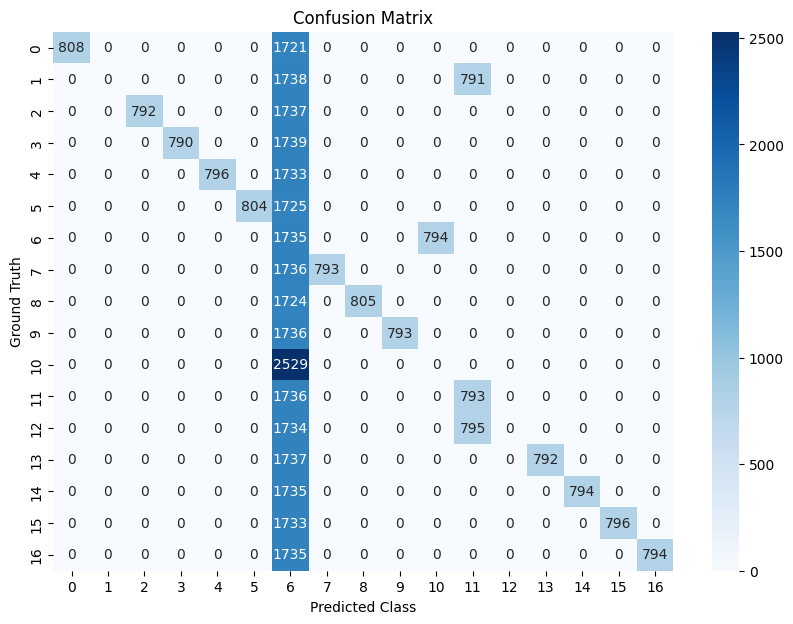


Accuracy per Class:
    Class  Accuracy
0       0  0.319494
1       1  0.000000
2       2  0.313167
3       3  0.312376
4       4  0.314749
5       5  0.317912
6       6  0.686042
7       7  0.313563
8       8  0.318308
9       9  0.313563
10     10  0.000000
11     11  0.313563
12     12  0.000000
13     13  0.313167
14     14  0.313958
15     15  0.314749
16     16  0.313958


/var/folders/z6/vlplg73s0cbgpvtzthyjl34h0000gn/T/ipykernel_9604/1310843425.py:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Class", y="Accuracy", data=accuracy_df, palette="viridis")


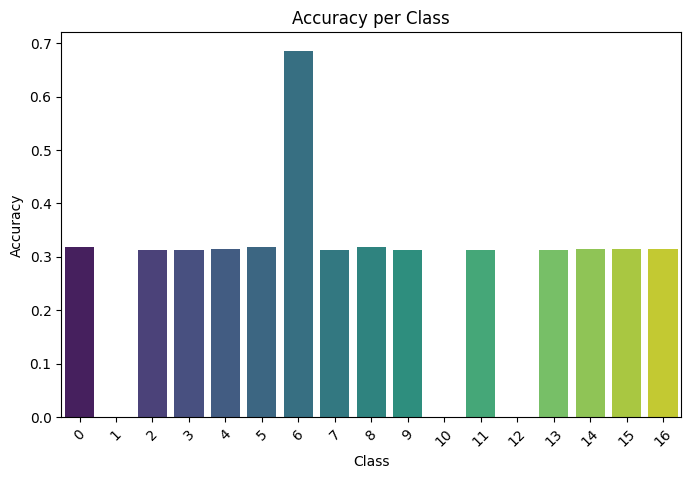

Train Accuracy: 0.0738
Test Accuracy: 0.7647


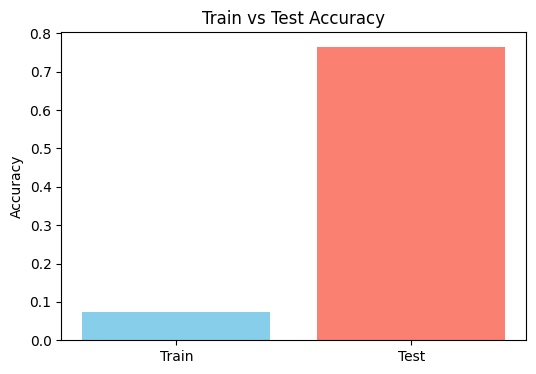


Top Misclassifications:
    Ground_Truth  Predicted_Class  Count
11            10                6   2529
4              3                6   1739
1              1                6   1738
15            13                6   1737
3              2                6   1737
8              7                6   1736
10             9                6   1736
12            11                6   1736
18            16                6   1735
16            14                6   1735


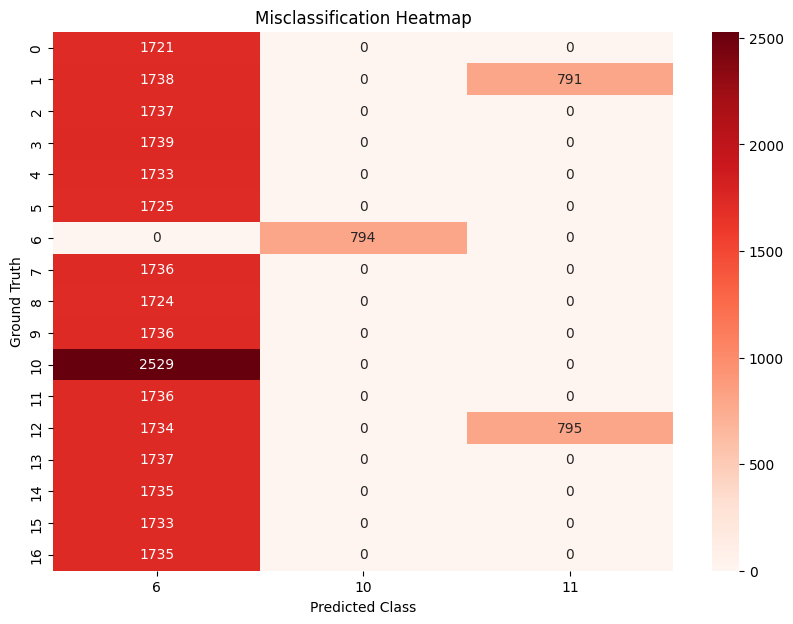

In [26]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Load the data
file_path = '/Users/marcobenavides/repos/ML4FG/3D-RBP/Results/predictions_ground_truth.csv'  # Replace with your file path

# Try reading the file with a comma separator
df = pd.read_csv(file_path, sep=",")  # Change sep="\t" to sep="," if the file is comma-separated

# If columns are correct, proceed; else, display the first few rows to debug
print("First 5 rows of the dataset:")
print(df.head())

# Verify column names
print("Columns in the dataset:", df.columns)

# Ensure column names are correctly parsed
if "Ground_Truth" not in df.columns:
    df.columns = ["Ground_Truth", "Predicted_Class", "Assignment"]

# Convert columns to integers for calculations
df["Ground_Truth"] = df["Ground_Truth"].astype(int)
df["Predicted_Class"] = df["Predicted_Class"].astype(int)

# Print dataset summary to confirm
print("\nDataset summary:")
print(df.info())
print(df.describe())

# -------------------------------
# 1. Generate Overall Accuracy
# -------------------------------
accuracy = accuracy_score(df['Ground_Truth'], df['Predicted_Class'])
print(f"Overall Accuracy: {accuracy:.4f}")

# -------------------------------
# 2. Classification Report
# -------------------------------
print("Classification Report:")
report = classification_report(df['Ground_Truth'], df['Predicted_Class'])
print(report)

# -------------------------------
# 3. Confusion Matrix Visualization
# -------------------------------
# Compute confusion matrix
cm = confusion_matrix(df['Ground_Truth'], df['Predicted_Class'])
classes = sorted(df['Ground_Truth'].unique())  # Sorted unique classes

# Plot confusion matrix heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.xlabel("Predicted Class")
plt.ylabel("Ground Truth")
plt.title("Confusion Matrix")
plt.show()

# -------------------------------
# 4. Accuracy per Class
# -------------------------------
class_accuracy = []
for c in classes:
    correct_preds = ((df['Ground_Truth'] == c) & (df['Predicted_Class'] == c)).sum()
    total_samples = (df['Ground_Truth'] == c).sum()
    acc = correct_preds / total_samples if total_samples > 0 else 0
    class_accuracy.append((c, acc))

# Convert to DataFrame for visualization
accuracy_df = pd.DataFrame(class_accuracy, columns=["Class", "Accuracy"])
print("\nAccuracy per Class:")
print(accuracy_df)

# Plot accuracy per class
plt.figure(figsize=(8, 5))
sns.barplot(x="Class", y="Accuracy", data=accuracy_df, palette="viridis")
plt.title("Accuracy per Class")
plt.xlabel("Class")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.show()

# -------------------------------
# 5. Train vs Test Assignment Analysis
# -------------------------------
train_df = df[df['Assignment'] == "train"]
test_df = df[df['Assignment'] != "train"]  # Assuming test is anything other than 'train'

# Accuracy for Train and Test
train_accuracy = accuracy_score(train_df['Ground_Truth'], train_df['Predicted_Class'])
test_accuracy = accuracy_score(test_df['Ground_Truth'], test_df['Predicted_Class'])

print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Visualization of Train vs Test Accuracy
plt.figure(figsize=(6, 4))
plt.bar(["Train", "Test"], [train_accuracy, test_accuracy], color=['skyblue', 'salmon'])
plt.title("Train vs Test Accuracy")
plt.ylabel("Accuracy")
plt.show()

# -------------------------------
# 6. Misclassification Analysis
# -------------------------------
misclassified = df[df['Ground_Truth'] != df['Predicted_Class']]
misclass_summary = misclassified.groupby(['Ground_Truth', 'Predicted_Class']).size().reset_index(name='Count')
print("\nTop Misclassifications:")
print(misclass_summary.sort_values(by='Count', ascending=False).head(10))

# Plot misclassifications as heatmap
pivot_table = misclass_summary.pivot(index="Ground_Truth", columns="Predicted_Class", values="Count").fillna(0)
plt.figure(figsize=(10, 7))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap="Reds")
plt.title("Misclassification Heatmap")
plt.xlabel("Predicted Class")
plt.ylabel("Ground Truth")
plt.show()
